<a href="https://colab.research.google.com/github/Mix1996/Project-2-Classification/blob/main/KMeans_Find_K_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [240]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dataset:

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.

Link to Dataset:https://docs.google.com/spreadsheets/d/e/2PACX-1vTG8ooiYbwcc6PX2yZwTUv3lVmSHqfYjHqSFEHKkwL4KXUs4CDLjWixJ32ZHP-Sk1KydhCceIQjsVjP/pub?output=csv

In [241]:
#Load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTG8ooiYbwcc6PX2yZwTUv3lVmSHqfYjHqSFEHKkwL4KXUs4CDLjWixJ32ZHP-Sk1KydhCceIQjsVjP/pub?output=csv')

In [242]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Task 1 Use  Kmeans to establish clusters based customers into groups based on similar characteristics. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.

In [243]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [244]:
# remove unnecessary columns
df.drop(columns=['Unnamed: 0','Customer Id'], inplace=True)
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

#### **Duplicates**

In [245]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###Missing Values

In [246]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 150 missing values.


In [247]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [248]:
# Calculate the proportion of 0s and 1s in the existing data
prop_0 = df['Defaulted'].value_counts(normalize=True).get(0, 0)
prop_1 = 1 - prop_0

# Replace missing values randomly based on the proportions
missing_indices = df['Defaulted'].isna()
df.loc[missing_indices, 'Defaulted'] = [random.choices([0, 1], weights=[prop_0, prop_1])[0] for _ in range(sum(missing_indices))]


In [249]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# Planning the Exploration

In [250]:
# define the columns you want to use (X is fine, but remember there isn't an X and y)

x = df[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio']]


In [251]:
# check head of new data
x.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


# Scale the Data

In [252]:
# scale the data using standard scaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

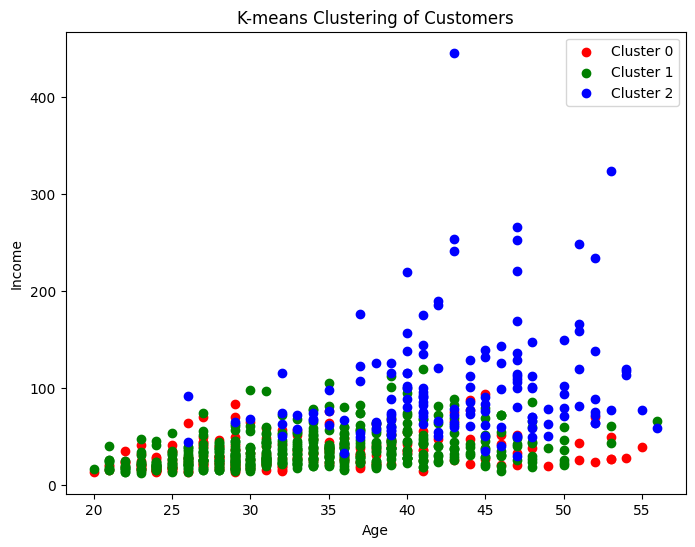

In [264]:
# Scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
# Add a 'cluster' column to the DataFrame
df['cluster'] = km.labels_
# Define cluster colors and labels
cluster_colors = ['r', 'g', 'b']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Create a scatter plot for each cluster
for i in range(len(cluster_labels)):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Income'],c=cluster_colors[i], label=cluster_labels[i])

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-means Clustering of Customers')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

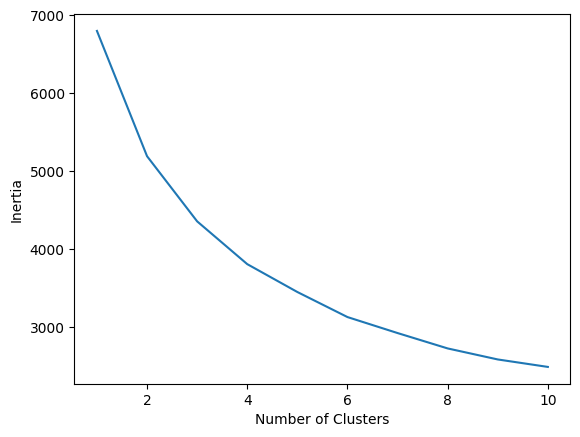

In [254]:
# define a range of values of k to evaluate for inertia and empty list
ks = range(1, 11)
inertias = []

# for each value for k
for k in ks:

  # fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  inertias.append(km.inertia_)

# and plot the results
plt.plot(ks, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

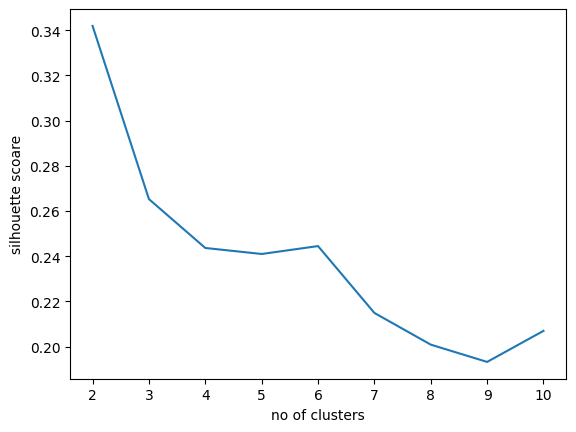

In [255]:
# define a range of values of k to evaluate for silhouette score and empty list
ks = range(2, 11)
sils = []


# for each value for k
for k in ks:

  # fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  sils.append(silhouette_score(scaled_x, km.labels_))



# and plot the results
plt.plot(ks, sils)
plt.xlabel('no of clusters')
plt.ylabel('silhouette scoare')
plt.show()

# Final Model and Clustering the Dataset

In [256]:
# instantiate a KMeans model with the value for k based on elbow plot method
# and silhouette score
km = KMeans(n_clusters=3, random_state=42)
km.fit(scaled_x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [257]:
# add a column to the dataframe to add the cluster label as you fit and predict x
df['cluster'] = km.labels_

In [258]:
# examine your dataframe with .head()
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,2


# Investigate each of the clusters.

## Feature Means

In [259]:
# Use .groupby() to investigate the average .
cluster_groups = df.groupby('cluster')

In [260]:
# calculate the average values for each cluster for each column
cluster_means = cluster_groups.mean()
cluster_means

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,32.482587,1.825871,4.577114,32.547264,1.521368,2.721463,0.995025,13.229851
1,33.688492,1.607143,7.638889,36.212302,0.837359,1.810373,0.000000,7.893254
2,43.220690,1.910345,17.317241,102.627586,4.223952,7.982862,0.158621,13.851724


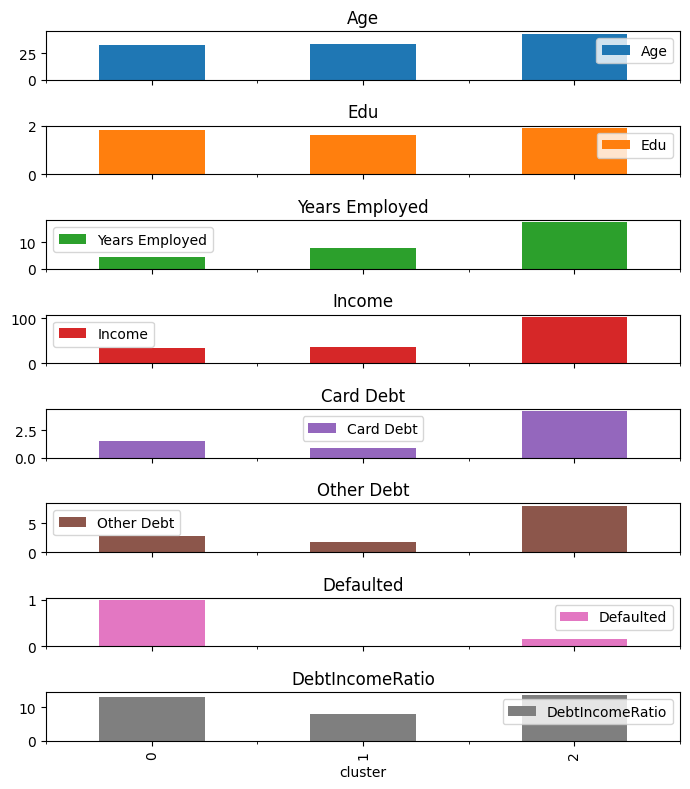

In [261]:
# Visualize means values of each column
cluster_means.plot(subplots=True, kind='bar', figsize=(7,8))
plt.tight_layout()

In [262]:
# Get all statistics for one column for each cluster
df.groupby('cluster')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,201.0,32.482587,8.006931,20.0,27.00,31.0,37.0,55.0
1,504.0,33.688492,7.010656,20.0,28.75,33.0,39.0,56.0
2,145.0,43.220690,6.133321,26.0,39.00,43.0,47.0,56.0


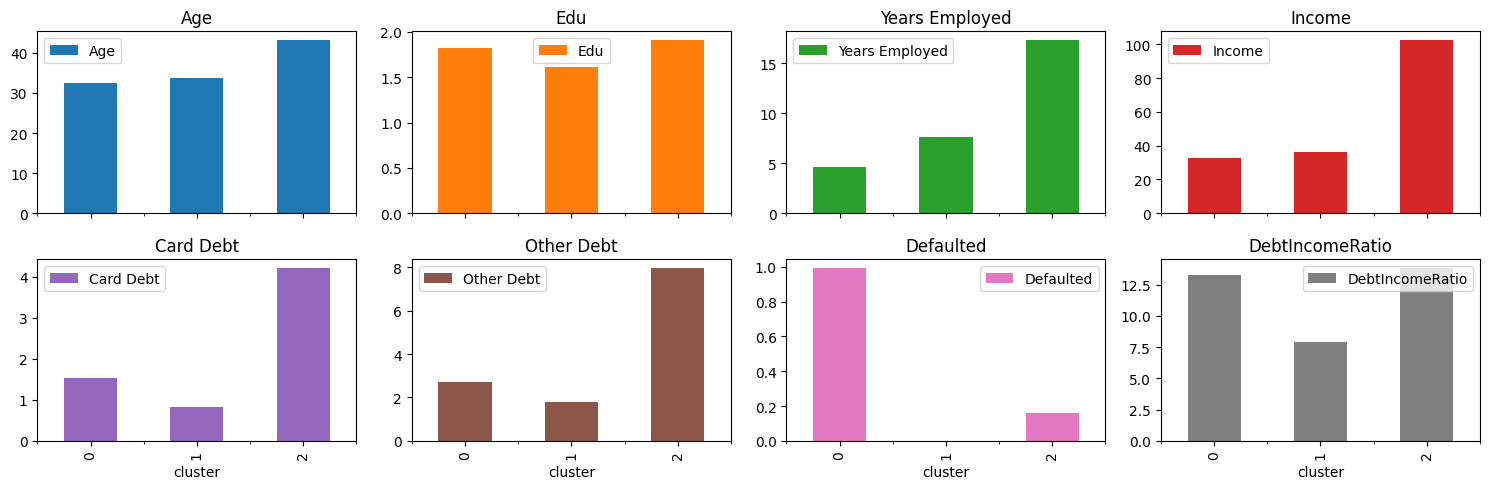

In [263]:
# using bar plot display each feature mean for the cluster

cluster_means.plot(subplots=True, kind='bar',
                     figsize=(15,5),
                     layout=(2,4))
plt.tight_layout()

#K based on the results.

Choose a K based on the results.

K = 3 Clusters based on the results of the Inertia & Elbow method as well as the Silhouette Scores